<a href="https://colab.research.google.com/github/satyaumi/data-analysis-using-python/blob/main/python_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Analysis on the diwali sales data using python

In [2]:
data =pd.read_csv('/content/Diwali Sales Data.csv',encoding='ISO-8859-1')


In [ ]:
#first we perform the info function to know which type of data anr in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#remove null values in the data set
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
#check the null values
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
data.dropna(inplace=True)


In [ ]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
#convert amount data type to int
data['Amount']=data['Amount'].astype('int')

In [ ]:
data.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [ ]:
# we can also re name the column index
data.rename(columns={'Marital_Status':'shaadi'})

In [ ]:
#perform the mathematical function in all data columns
data.describe()


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

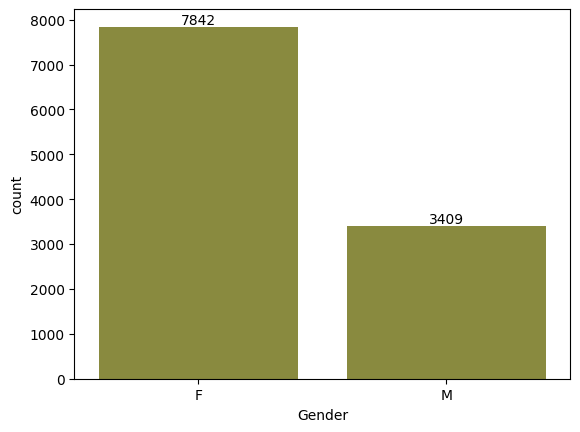

In [ ]:
ax =sns.countplot(x='Gender',data=data,color=('#959633'))
for bar in ax.containers:
  ax.bar_label(bar)


In [ ]:
sales_gen =data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [ ]:
sales_gen

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


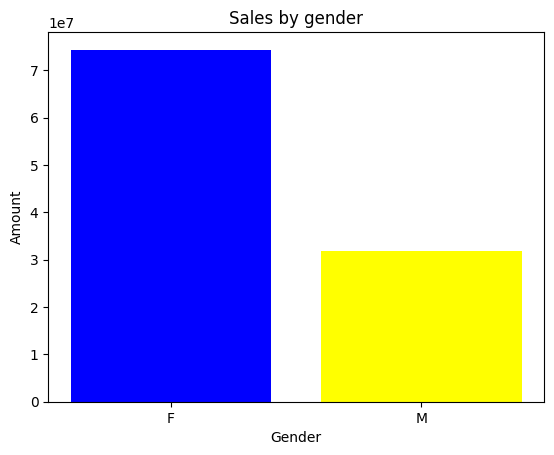

In [ ]:
# sns.barplot(x='Gender',y='Amount',data='sales_gen')
plt.bar(sales_gen['Gender'],sales_gen['Amount'],color=('blue','yellow'),label='Amount')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Sales by gender')
plt.show()



1. from above graphs we can see that must of the buyers are of age group between 20-35 years female  






# age

<Axes: xlabel='Age Group', ylabel='count'>

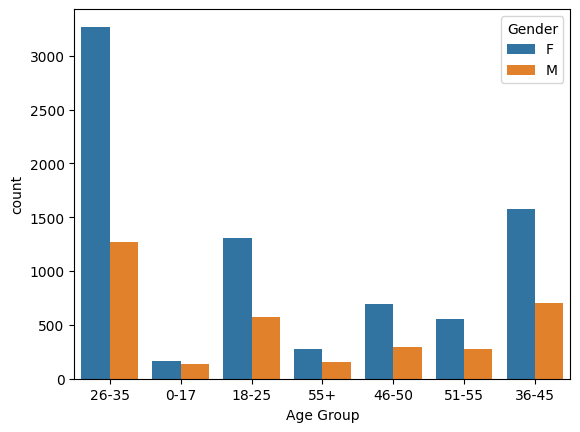

In [ ]:
sns.countplot(data=data,x='Age Group',hue='Gender')

<Axes: xlabel='Age Group', ylabel='Amount'>

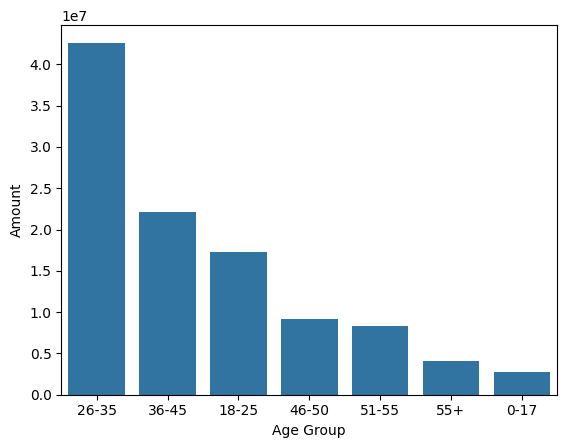

In [ ]:
#total amount vs age group
sales_age =data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

1. from above graph most of the buyers are of age group between 26-35 yrs female

# state

In [ ]:
sales_state =data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

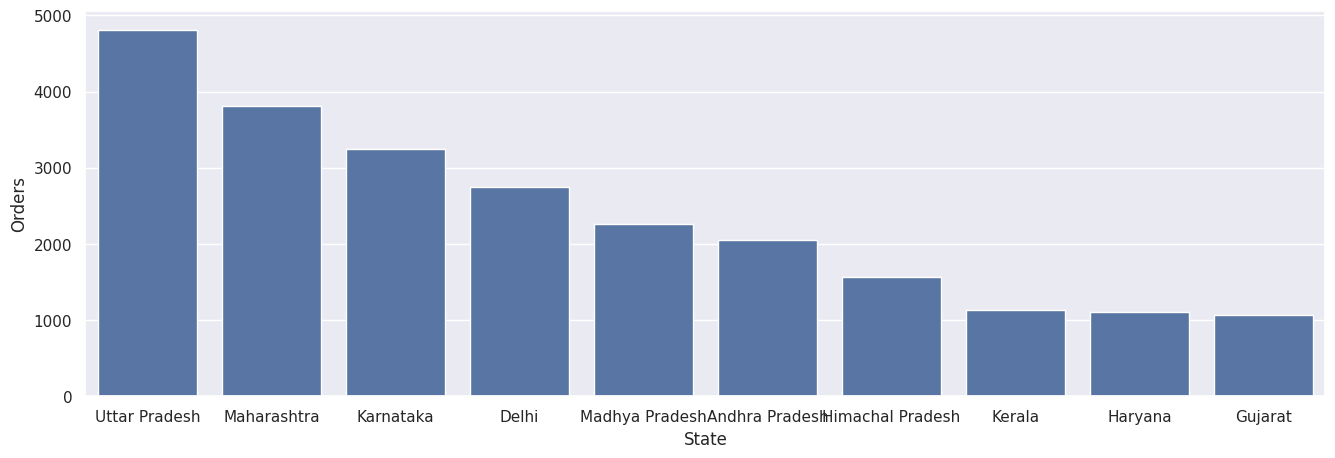

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

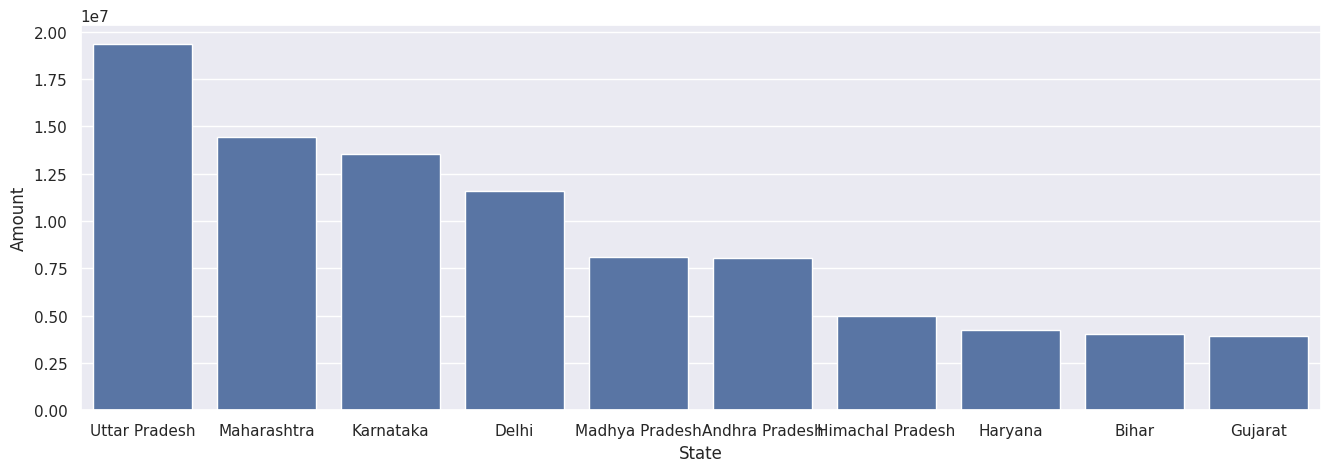

In [ ]:
#Total amount/sales from topm 10 states
sales_state=sales_state =data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State',y='Amount')



1. from above we can see the most of the orders are from uttar pradesh,maharastra and karnataka respectively

# marital status

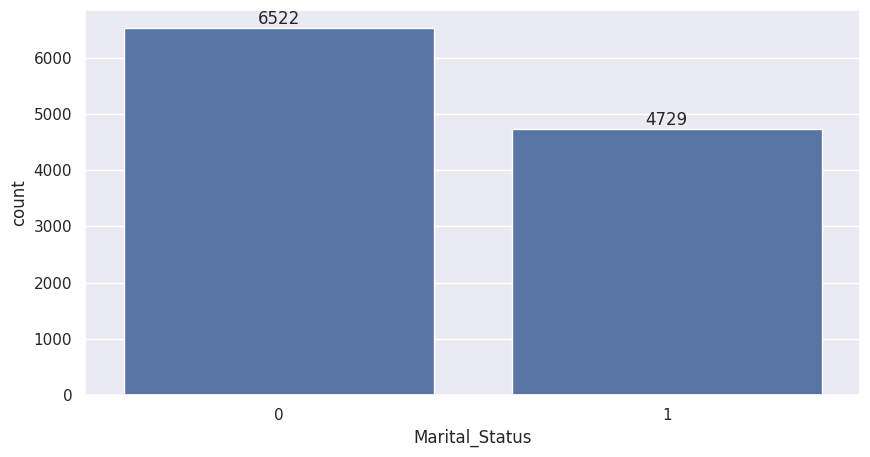

In [ ]:
ax=sns.countplot(data=data,x='Marital_Status')
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

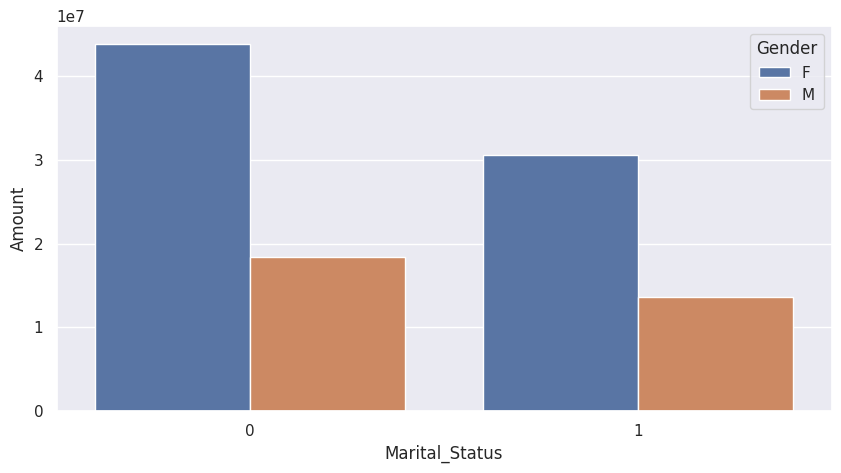

In [ ]:
sales_state =data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

1.from the above graphs we can see that most of the buyers are married(woman) and they have high puchasing power


# occupation

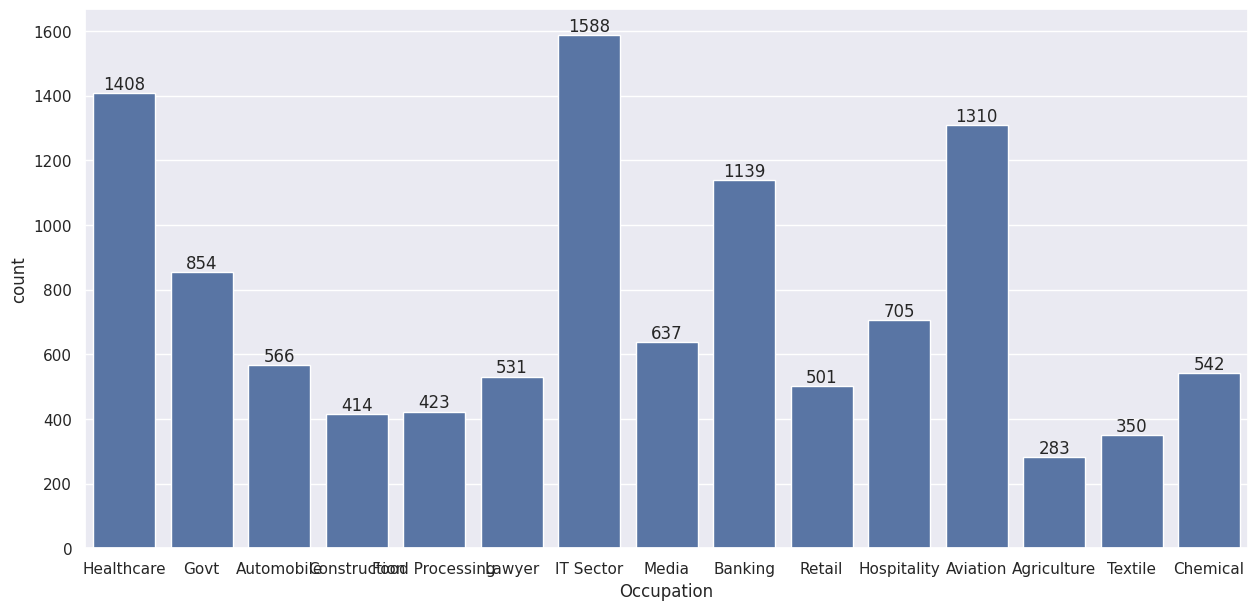

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
ax =sns.countplot(data=data,x ='Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

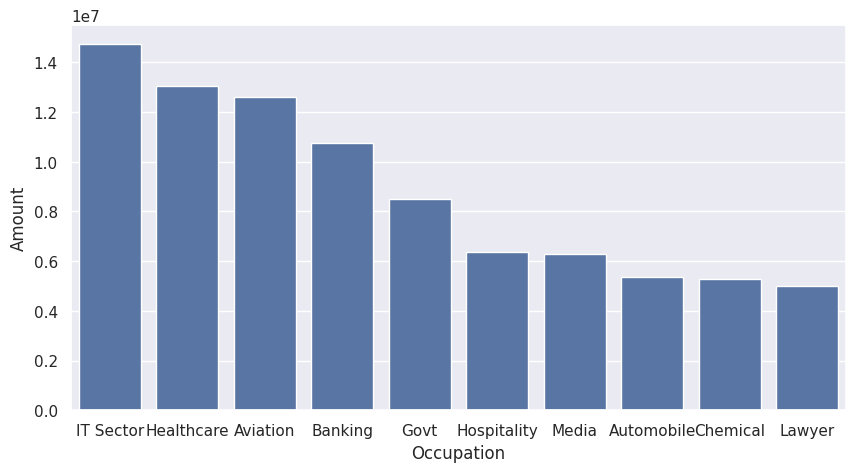

In [ ]:
sales_state=sales_state =data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')


1. from above graphs we can see that most of the buyers are working in It ,Healthcare and Avitation and sector

#product category

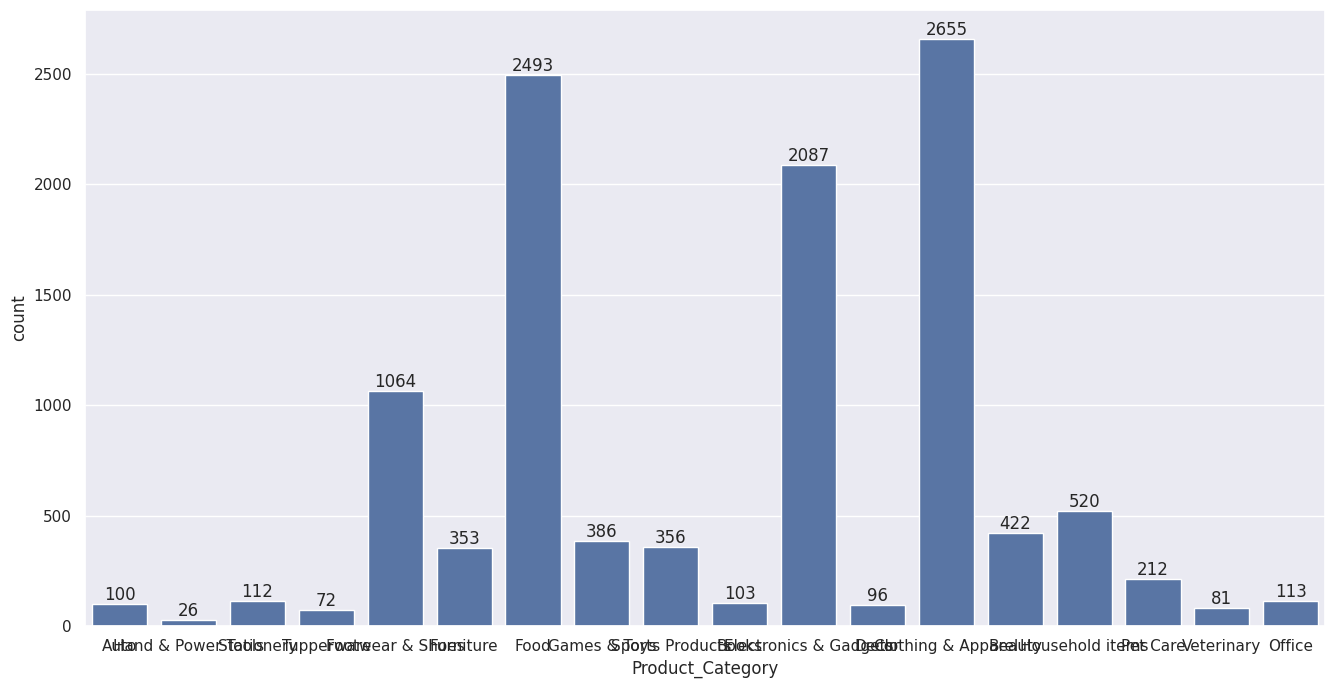

In [5]:
sns.set(rc={'figure.figsize':(16,8)})
ax =sns.countplot(data=data,x ='Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

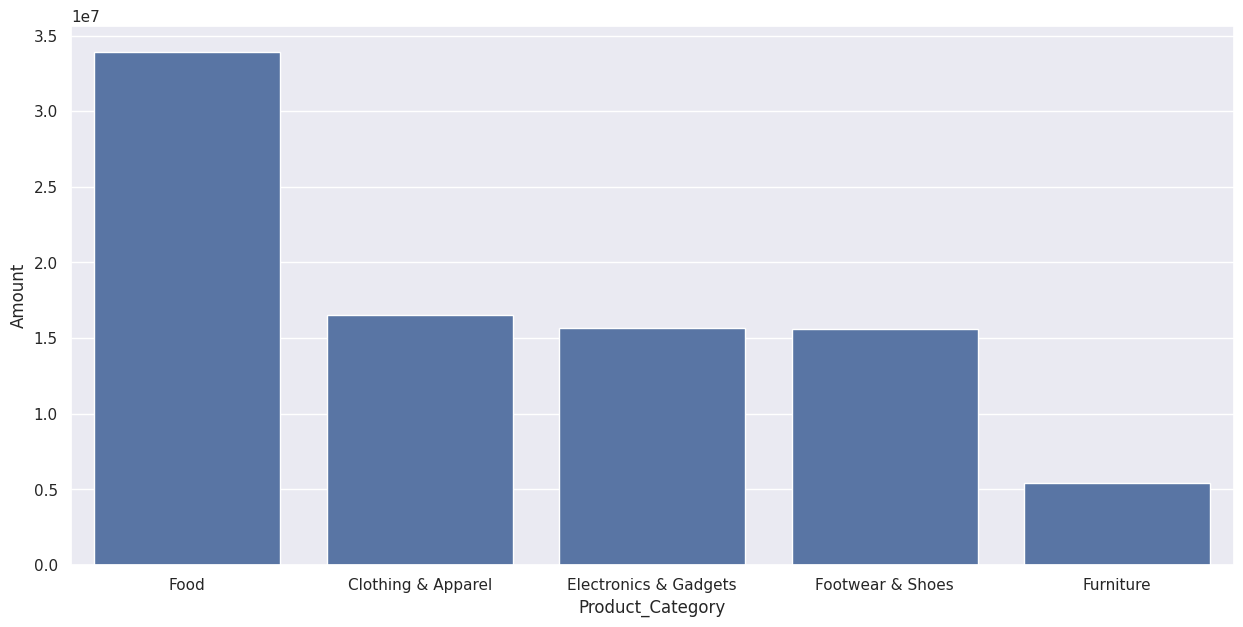

In [ ]:
sales_state=sales_state =data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')



1. from above graph we can see that moast of the sold products are from food,footwear and electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

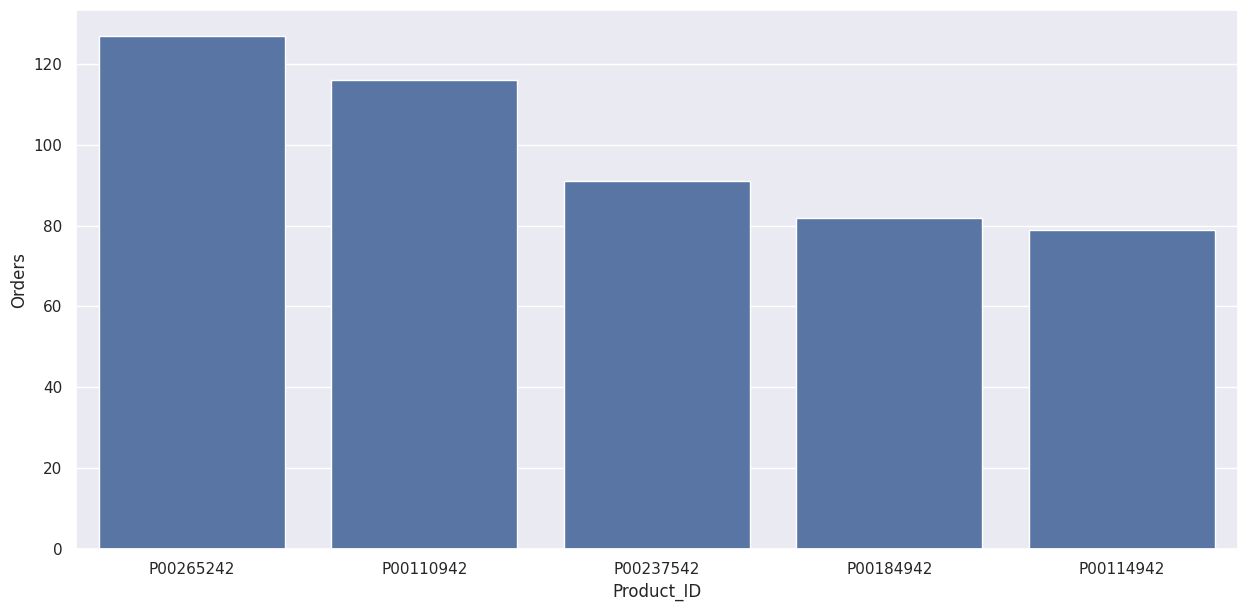

In [ ]:
sales_state=sales_state =data.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

# conclusion

1. married woman age group 26-25 yrs from up, maharasta and karnatak working in mit,healthcare and avitation are more likely by product from food,clothing and electironics category